<a href="https://colab.research.google.com/github/Fahridanaa/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Nama: Fahridana Ahmad Rayyansyah

Kelas: TI-3B

Absen: 10

---

# MODUL 5 - Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


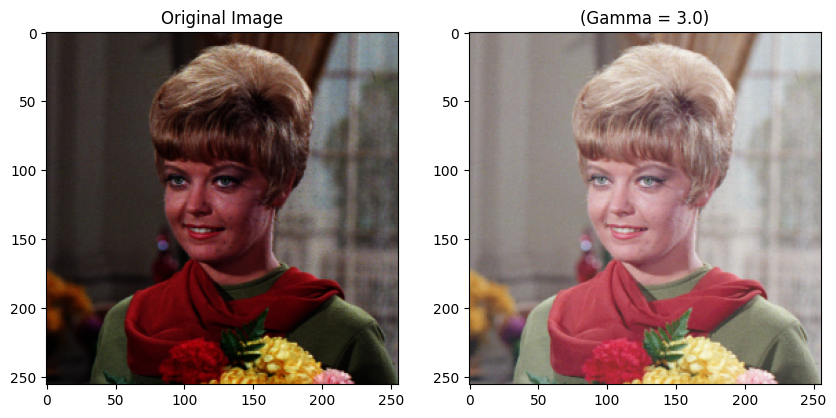

In [ ]:
print('Gamma Correction pada citra')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

image_path = 'drive/MyDrive/PCVK/Images/female.tiff'
image = cv.imread(image_path)

if image is None:
    print('Error: Image not found or failed to load.')
    exit()

gamma_corrected = 255 * np.power(image / 255.0, 1 / gamma)

gamma_corrected = np.uint8(gamma_corrected)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_corrected, cv.COLOR_BGR2RGB))
plt.title(f'(Gamma = {gamma})')

plt.show()

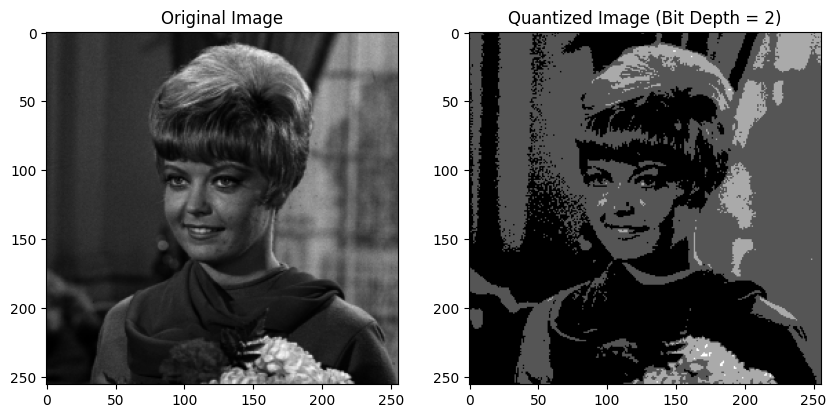

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

depth_image = np.round(original / level) * level
depth_image = np.uint8(depth_image)

# Display the original and quantized images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')

# Quantized Image
plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Quantized Image (Bit Depth = {bit_depth})')

plt.show()

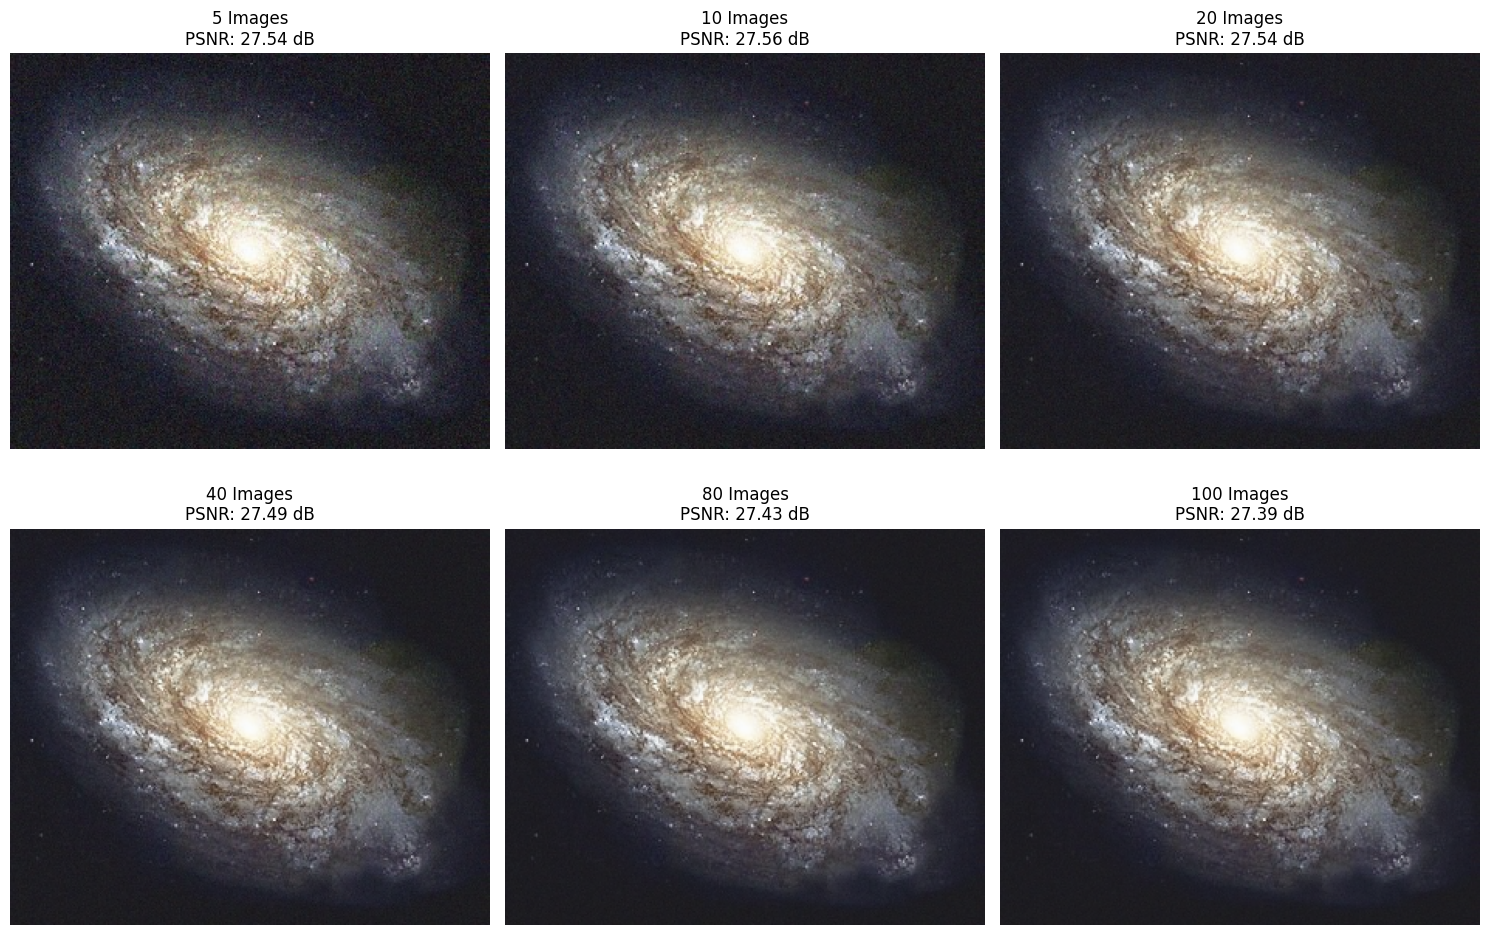

In [ ]:
import glob
from math import log10, sqrt
import matplotlib.pyplot as plt


original_img = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')


# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
 n= cv.imread(img)

 cv_img.append(n)


rows = 2
cols = 3

test_images_counts = [5, 10, 20, 40, 80, 100]
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

for index, num_images in enumerate(test_images_counts):
    average_img = np.zeros(cv_img[0].shape, np.float32)

    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv.convertScaleAbs(denoised_img)

    psnr_value = PSNR(original_img, denoised_img)

    row = index // cols
    col = index % cols

    axs[row, col].imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
    axs[row, col].set_title(f'{num_images} Images\nPSNR: {psnr_value:.2f} dB')
    axs[row, col].axis('off')

for idx in range(len(test_images_counts), rows * cols):
    row = idx // cols
    col = idx % cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.
1. **Peningkatan PSNR Seiring Penambahan Jumlah Gambar**: Ketika lebih banyak gambar berisik digunakan untuk perhitungan rata-rata, hasil denoised image semakin mendekati gambar asli. Hal ini tercermin dari PSNR yang semakin tinggi seiring dengan penambahan jumlah gambar. Ini menunjukkan bahwa dengan semakin banyak gambar digunakan, proses denoising menjadi lebih efektif.

2. **Efektivitas Metode Denoising**: Metode perata-rataan beberapa gambar berisik tampak efektif dalam meningkatkan kualitas gambar. Ini terjadi karena derau acak di setiap gambar cenderung terdistribusi secara acak, dan dengan merata-ratakan gambar, derau tersebut dapat dihilangkan hingga titik tertentu, sedangkan detail gambar tetap dipertahankan.

3. **Batasan Penambahan Gambar**: Pada titik tertentu, peningkatan jumlah gambar mungkin menghasilkan peningkatan PSNR yang lebih kecil, menunjukkan bahwa metode ini memiliki batas efektivitas. Setelah jumlah gambar mencapai ambang tertentu, tambahan gambar mungkin tidak lagi memberikan peningkatan signifikan pada kualitas gambar.

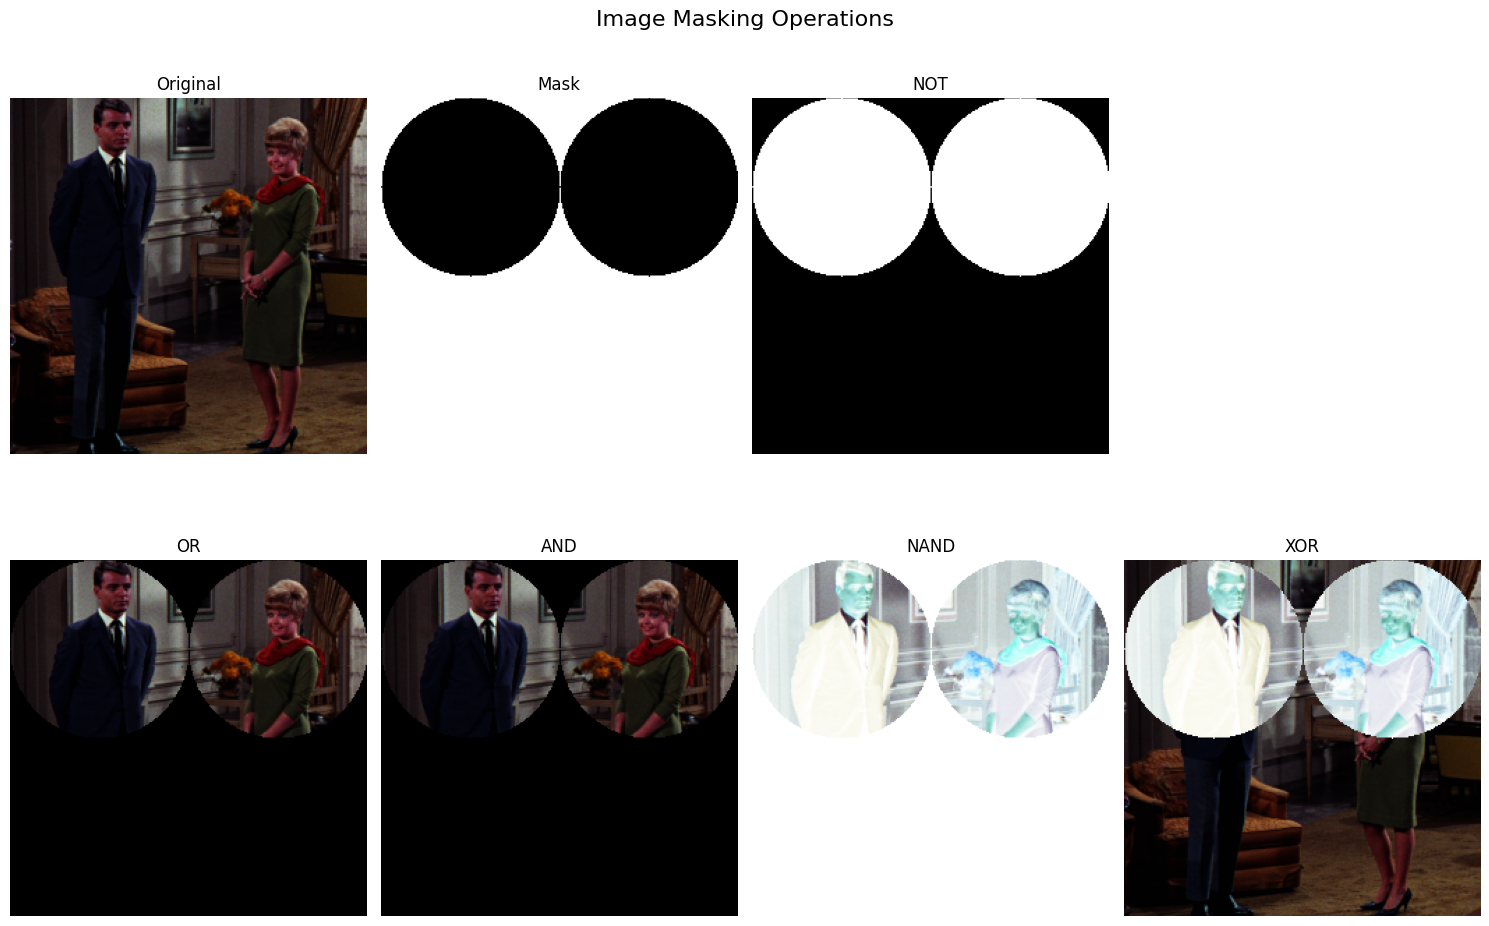

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Buat mask
mask = np.ones(img.shape[:2], dtype=np.uint8) * 255
cv.circle(mask, (img.shape[1]//4, img.shape[0]//4), min(img.shape[0]//4, img.shape[1]//4), 0, -1)
cv.circle(mask, (3*img.shape[1]//4, img.shape[0]//4), min(img.shape[0]//4, img.shape[1]//4), 0, -1)

# NOT
not_result = cv.bitwise_not(mask)

# OR
or_result = cv.bitwise_or(img, img, mask=cv.bitwise_not(mask))

# AND
and_result = cv.bitwise_and(img, img, mask=cv.bitwise_not(mask))

# NAND
nand_result = cv.bitwise_not(cv.bitwise_and(img, img, mask=cv.bitwise_not(mask)))

# XOR
xor_result = cv.bitwise_xor(img, cv.cvtColor(cv.bitwise_not(mask), cv.COLOR_GRAY2RGB))

# Persiapkan plot
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Image Masking Operations', fontsize=16)

# Tampilkan hasil
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(mask, cmap='gray')
axs[0, 1].set_title('Mask')
axs[0, 2].imshow(not_result, cmap='gray')
axs[0, 2].set_title('NOT')
axs[1, 0].imshow(or_result)
axs[1, 0].set_title('OR')
axs[1, 1].imshow(and_result)
axs[1, 1].set_title('AND')
axs[1, 2].imshow(nand_result)
axs[1, 2].set_title('NAND')
axs[1, 3].imshow(xor_result)
axs[1, 3].set_title('XOR')

# Hapus axis
for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

Original: Ini adalah gambar asli setelah diubah ke format RGB menggunakan cv.cvtColor(). Ini disimpan untuk perbandingan dengan hasil operasi bitwise.

Mask: Mask yang dibuat berupa array 2D (berukuran sama dengan gambar) berisi nilai 255 (putih), kecuali pada dua lingkaran hitam yang memiliki nilai 0. Fungsi mask ini akan menentukan area di gambar yang terkena atau tidak terkena operasi bitwise. Lingkaran tersebut terletak di kuadran kiri atas dan kanan atas gambar.

NOT: Operasi NOT membalik nilai pixel dari mask. Area putih (255) diubah menjadi hitam (0), dan area hitam (0) diubah menjadi putih (255). Dengan ini, lingkaran hitam dari mask awal sekarang berubah menjadi putih, dan sebaliknya untuk latar belakangnya.

OR: Operasi OR dilakukan antara gambar asli dan dirinya sendiri, tetapi hanya pada area yang diizinkan oleh mask yang telah di-NOT. Hasilnya, bagian gambar yang sesuai dengan lingkaran hitam pada mask awal akan tetap terlihat (karena area tersebut menjadi putih pada mask NOT), sedangkan bagian lainnya akan dihitamkan.

AND: Operasi AND membandingkan nilai pixel dari gambar asli dengan dirinya sendiri, tetapi hanya pada area yang ditentukan oleh mask yang di-NOT. Hasilnya, area di luar lingkaran pada mask akan dihitamkan, dan bagian dalam lingkaran akan tetap seperti gambar asli.

NAND: Operasi NAND adalah kebalikan dari operasi AND. Hasilnya akan mengembalikan gambar di mana area di luar lingkaran tetap seperti gambar asli, tetapi area di dalam lingkaran dihitamkan, memberikan efek sebaliknya dari hasil AND.

XOR: Operasi XOR dilakukan antara gambar asli dengan hasil operasi NOT dari mask, yang diubah menjadi gambar berwarna. Operasi XOR menghasilkan perbedaan di antara kedua input, sehingga pada area lingkaran, hasilnya akan menghasilkan efek yang berbeda, tergantung pada apakah nilai pixel dalam lingkaran tersebut sama dengan gambar aslinya atau tidak.